In [1]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import matplotlib

matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'bold'
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16

%matplotlib inline

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
f_root = TFile("Files/SelectionII_ccpi0_dQdx_v9.root") 
name_v = ['All','Cosmic','CC 1-$\\pi^0$','CC 0-$\\pi^0$','NC $\\pi^0$','NC 0-$\\pi^0$','Other']
label_v = ['All','Cosmic','CC1pi0','CC0pi0','NC1pi0','NC0pi0','Other']
color_v = ['blue','purple','yellow','lime','green','lightskyblue','salmon'] 

In [3]:
def make2DHist(hist,xlabel,ylabel,var1,var2,xmin,xmax,ymin,ymax,mult='Mult = 1',nbins=100,\
               x00=0,x01=0,y00=0,y01=0,x10=0,x11=0,y10=0,y11=0,a_v=[],t_v=[]):
   
    for n in xrange(0,len(name_v)):
    
        hist_name = hist + str(n)
        h = f_root.Get(hist_name) 
   
        h_v, edges = rn.hist2array(h,return_edges=True)
         
        binsx = (edges[0][:-1] + edges[0][1:])/2
        binsy = (edges[1][:-1] + edges[1][1:])/2

        x, y = binsx, binsy
        display = np.zeros([len(y),len(x)])

        y_new = []; x_new = []
    
        for i in xrange(binsx.shape[0]):
            for j in xrange(binsy.shape[0]):
                k = h_v[i][j]
                while k > 0:
                    y_new.append(binsy[j])
                    x_new.append(binsx[i])
            
                    k -= 1
        
        x = np.linspace(0,9,9)
        
        H, xedges, yedges = np.histogram2d(y_new,x_new,bins=nbins,range=((ymin,ymax),(xmin,xmax)))
        Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero

        fig = plt.figure(figsize=(8,6))
        
        plt.pcolormesh(yedges,xedges,Hmasked)
        plt.grid(True)
        plt.colorbar()
        plt.title("Track %s, %s"%(mult,name_v[n]),fontsize=20,weight='bold')
        plt.xlabel(xlabel,fontsize=16,weight='bold')
        plt.ylabel(ylabel,fontsize=16,weight='bold')
        if (x01 != 0):
            plt.plot((x00, x01), (y00, y01), '-',color='fuchsia',lw=3)
            plt.plot((x10, x11), (y10, y11), '-',color='fuchsia',lw=3)
         
        if ( var1 == 'mult2_dedx' ):
            plt.plot((2.5,4.0),(2.5,4.0),'-',color='fuchsia',lw=4)

        ax0 = a_v[0]; ax1 = a_v[1]; ay0 = a_v[2]; ay1 = a_v[3];
        tx = t_v[0]; ty = t_v[1]

        ax = plt.axes()
        ax.arrow(ax0, ay0, ax1, ay1, head_width=a_v[4], head_length=a_v[5], fc='fuchsia',ec='fuchsia',lw=2)
        plt.text(tx, ty, 'Cut',fontsize=18,weight='bold',color='fuchsia')

        plt.savefig('Plots/CutJustify_sel2_%s_v_%s_%s.png' % (var1,var2,label_v[n]))

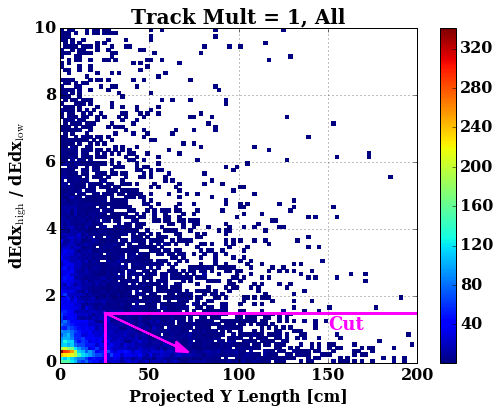

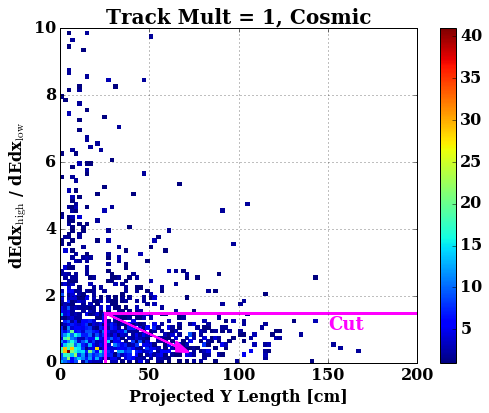

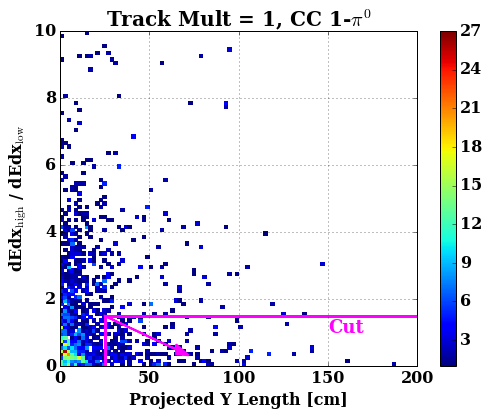

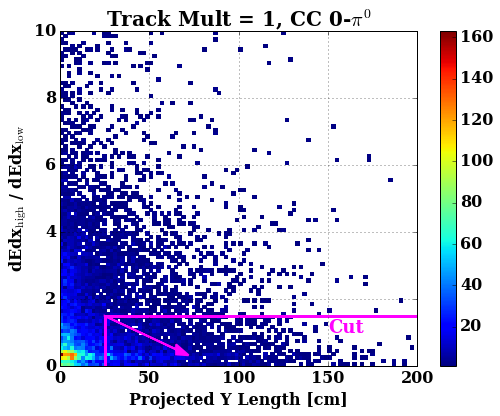

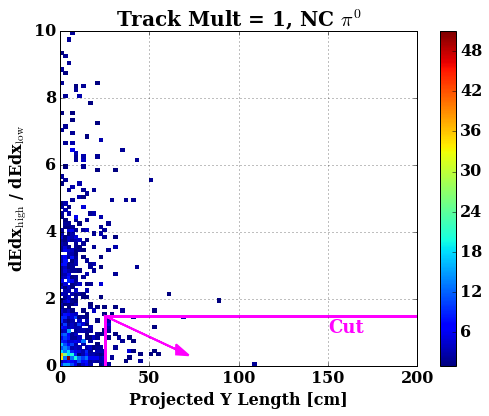

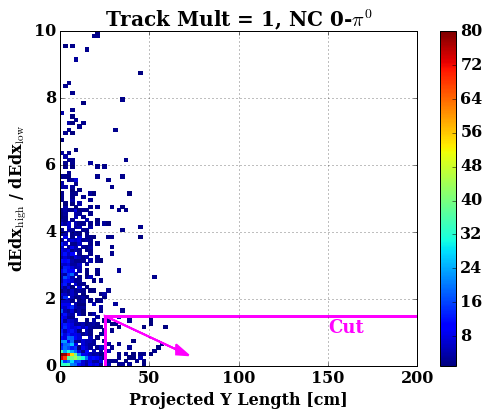

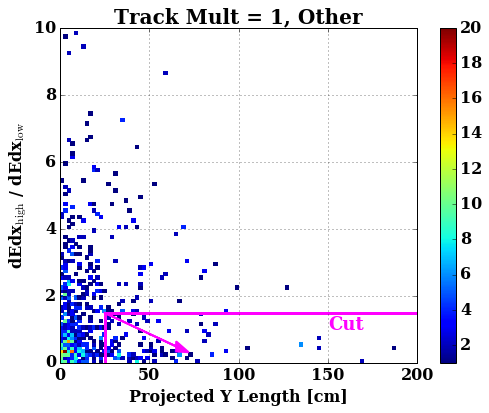

In [109]:
make2DHist("hSingleTrackLengthRatioVsdEdxRatio_2_",\
          "Projected Y Length [cm]", 'dEdx$_\mathrm{high}$ / dEdx$_\mathrm{low}$','mult1_dedxratio','projylen',\
          0,200,0,10,x00=25,x01=200,y00=1.5,y01=1.5,x10=25,x11=25,y10=0,y11=1.5,a_v=[25,40,1.49,-1,0.3,7],t_v=[150,1])

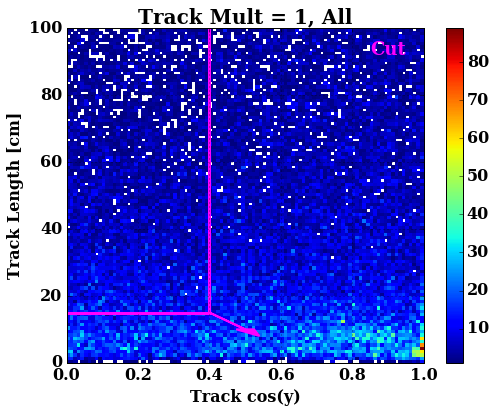

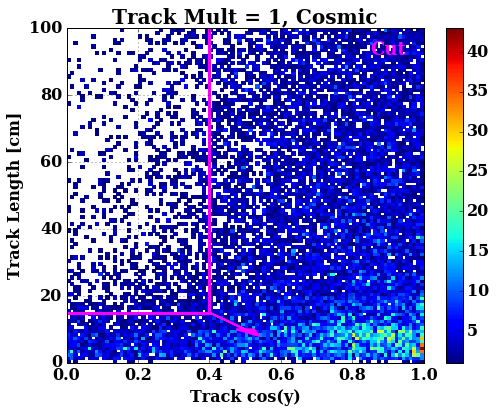

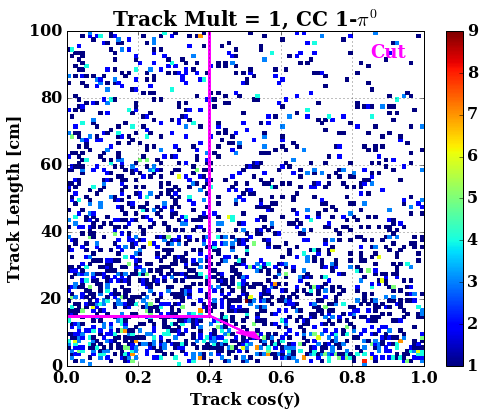

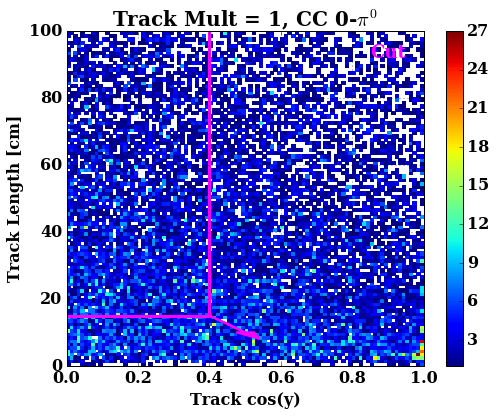

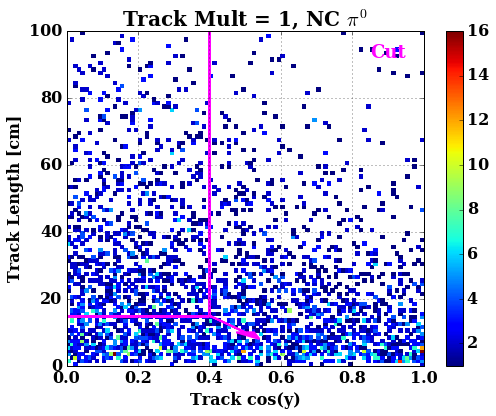

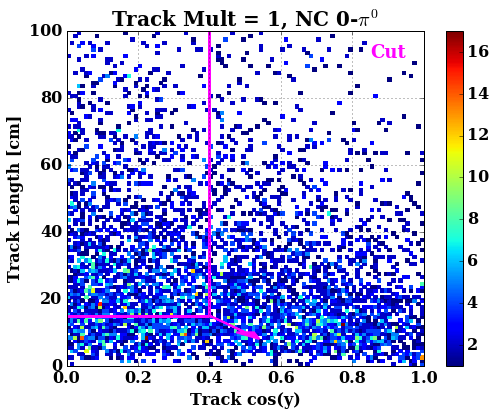

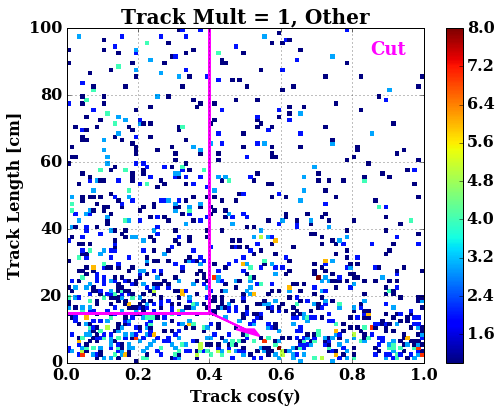

In [110]:
make2DHist("hCosVsLen_2_","Track cos(y)","Track Length [cm]",'mult1_length','cosy',\
          0,1,0,100,x00=0.4,x01=0.4,y00=15,y01=100,x10=0,x11=0.4,y10=15,y11=15,\
           a_v=[0.4,0.1,15,-5,0.05,2],t_v=[0.85,92])
# plt.plot((0.4, 0.4), (15,100),'-',color='fuchsia',lw=4,label='MCC8.2 Proposed')
# plt.plot((0,0.4), (15, 15),'-',color='fuchsia',lw=4)

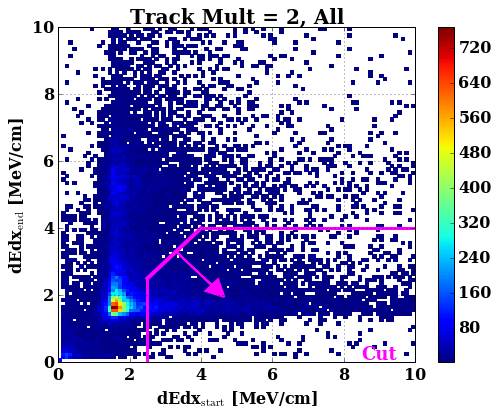

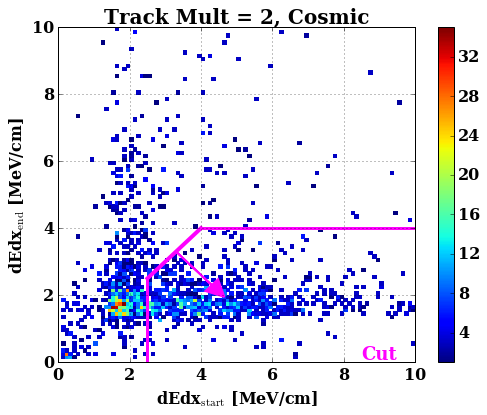

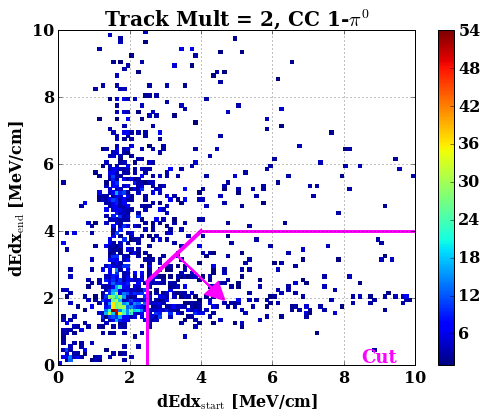

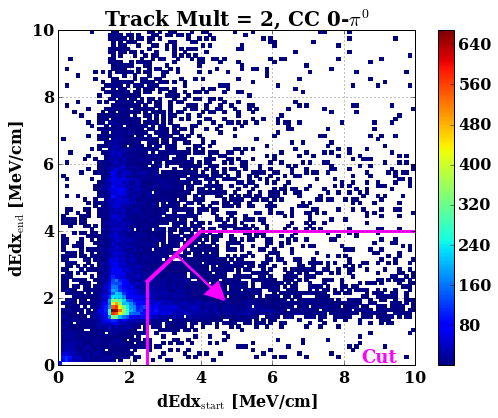

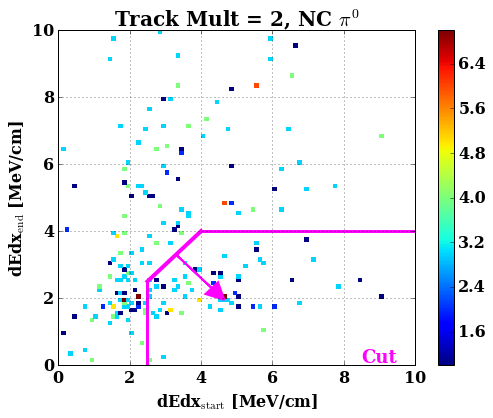

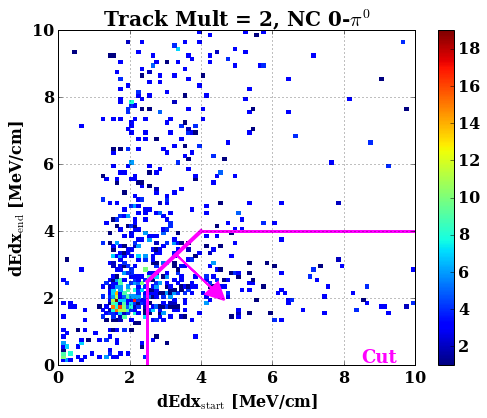

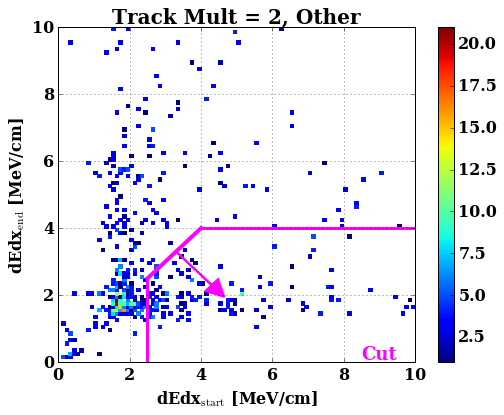

In [117]:
make2DHist("hLongTrackdEdxStartEnd_2_",\
          "dEdx$_\mathrm{start}$ [MeV/cm]","dEdx$_\mathrm{end}$ [MeV/cm]",'mult2_dedx','dedx',\
          0,10,0,10,"Mult = 2",x00=2.5,x01=2.5,y00=0,y01=2.5,x10=4,x11=10,y10=4,y11=4,\
          a_v=[3.3,1,3.3,-1,0.5,0.5],t_v=[8.5,0.1])


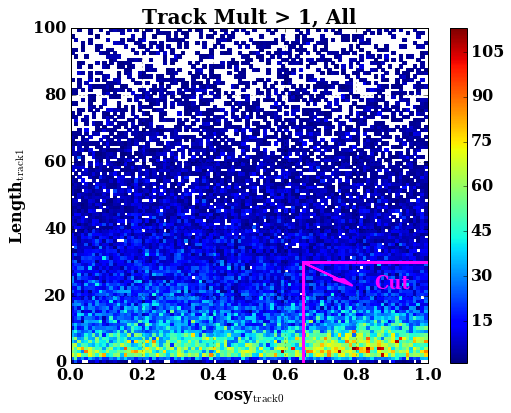

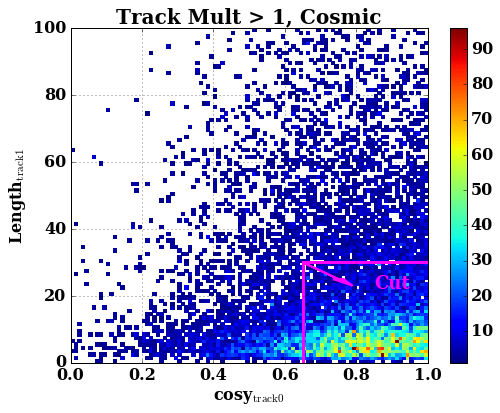

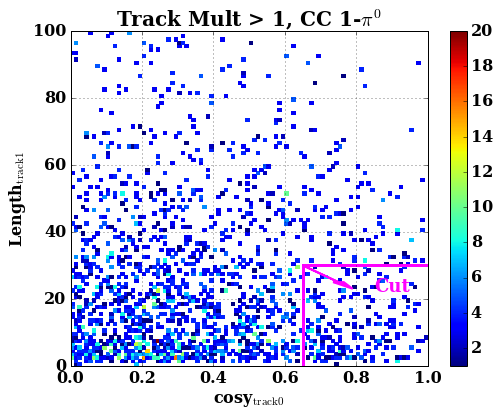

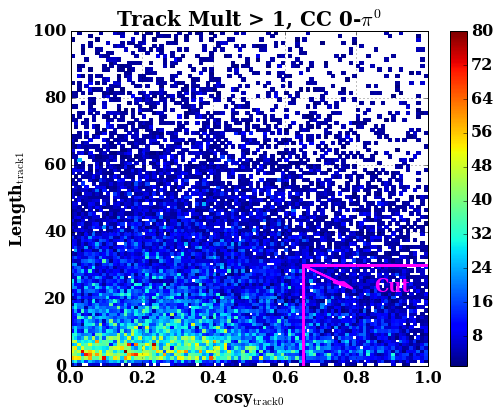

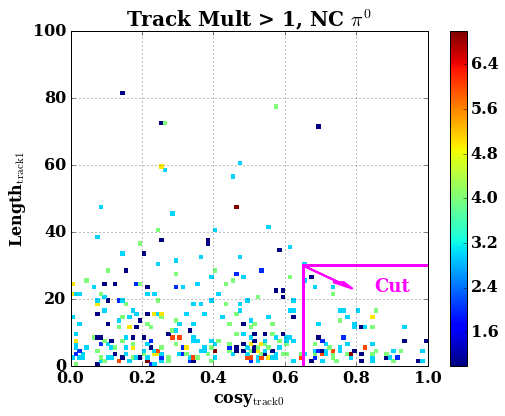

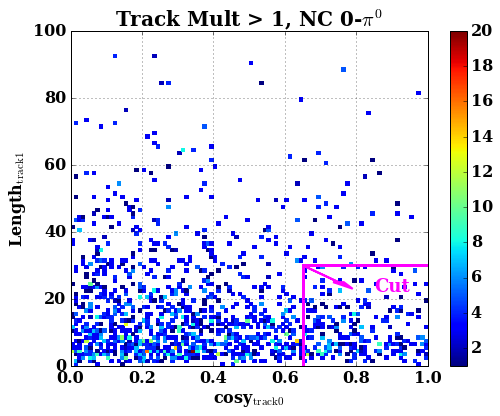

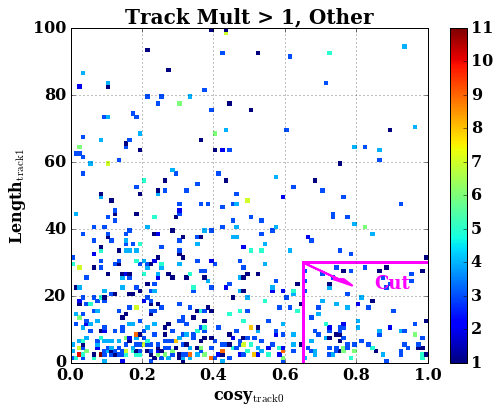

In [124]:
make2DHist("hCos0VsLen1_2_",\
          "cosy$_\mathrm{track0}$","Length$_\mathrm{track1}$",'multgt1_len','cosy',\
          0,1,0,100,'Mult > 1',x00=0.65,x01=0.65,y00=0,y01=30,x10=0.65,x11=1,y10=30,y11=30,\
           a_v=[0.65,0.1,30,-5,0.03,2],t_v=[0.85,22])



In [17]:
def dEdxVsX(hist,sample,xmin,xmax,ymin,ymax,mult='Mult = 1',plane=-1):
   
    hist_name = str(hist)
    h = f_root.Get(hist) 
    #print h.GetNbinsX()
    h_v, edges = rn.hist2array(h,return_edges=True)
    #print "COUNTS: ", h_v
    #print "Edges ", edges
    
    binsx = (edges[0][:-1] + edges[0][1:])/2
    binsy = (edges[1][:-1] + edges[1][1:])/2

    x, y = binsx, binsy
    display = np.zeros([len(y),len(x)])

    y_new = []; x_new = []
    
    for i in xrange(binsx.shape[0]):
        for j in xrange(binsy.shape[0]):
            k = h_v[i][j]
            while k > 0:
                y_new.append(binsy[j])
                x_new.append(binsx[i])
            
                k -= 1
        
    x = np.linspace(0,9,9)
        
    H, xedges, yedges = np.histogram2d(y_new,x_new,bins=(100,38),range=((ymin,ymax),(xmin,xmax)))
    Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
    
    fig = plt.figure(figsize=(8,6))
    plt.pcolormesh(yedges,xedges,Hmasked)
    X0, X1 = 0, 256
    
    if sample == 'MC':
        if plane == 0:
            #X0,X1,Y0,Y1 = 0,250,1.65,1.85 #95
            Y0,Y1 = 1.7,1.95
            slope0 = (Y1 - Y0)/(X1 - X0)
            plt.plot((0,250),(Y0,Y1),'k-',lw=2,label='Empirical m,b : %.7f, %.2f'%(slope0,Y0))
        if plane == 1:
            #X0,X1,Y0,Y1 = 0,250,1.65,1.85 #95
            Y0,Y1 = 1.7,1.95
            slope0 = (Y1 - Y0)/(X1 - X0)
            plt.plot((0,250),(Y0,Y1),'k-',lw=2,label='Empirical m,b : %.7f, %.2f'%(slope0,Y0))
        if plane == 2:
            #X0,X1,Y0,Y1 = 0,250,1.6,1.72 #95
            Y0,Y1 = 1.6,1.8
            slope0 = (Y1 - Y0)/(X1 - X0)
            plt.plot((0,250),(Y0,Y1),'k-',lw=2,label='Empirical m,b : %.7f, %.2f'%(slope0,Y0))
    
    if sample == 'OnBeam' or sample == 'OffBeam':
        if plane == 0:
            # possibly new
            #X0,X1,Y0,Y1 = 0,250,1.54,1.54 #95
            Y0,Y1 = 1.53,1.45
            slope0 = (Y1 - Y0)/(X1 - X0)
            plt.plot((0,250),(Y0,Y1),'k-',lw=2,label='Empirical m,b : %.7f, %.2f'%(slope0,Y0))
        if plane == 1:
            #X0,X1,Y0,Y1 = 0,250,2.7,2.8 #95
            Y0,Y1 = 2.5, 3.2
            slope0 = (Y1 - Y0)/(X1 - X0)
            plt.plot((0,250),(Y0,Y1),'k-',lw=2,label='Empirical m,b : %.7f, %.2f'%(slope0,Y0))
        if plane == 2:
            #X0,X1,Y0,Y1 = 0,250,1.4,1.45 #95
            Y0,Y1 = 1.4,1.45
            slope0 = (Y1 - Y0)/(X1 - X0)
            plt.plot((0,250),(Y0,Y1),'k-',lw=2,label='Empirical m,b : %.7f, %.2f'%(slope0,Y0))
    
    plt.axhline(1.63,lw=2,ls='--',color='k',label='x = 1.63 [MeV/cm]')
    plt.grid(True)
    plt.legend()
    #matplotlib.colors.Normalize(vmin=0.,vmax=500.)
    #plt.colorbar(boundaries=np.linspace(0,600,61),values=np.linspace(0,600,60)) 
    plt.colorbar()
    plt.title("Track %s"%(mult),fontsize=20,weight='bold')
    plt.xlabel('X [cm]',fontsize=16,weight='bold')
    plt.ylabel('dEdx [MeV/cm]',fontsize=16,weight='bold')
    plt.savefig('Plots/CutJustify_sel2_%s_%s.png' % (sample,hist_name))

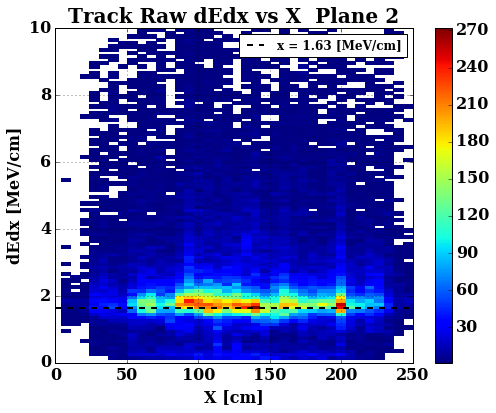

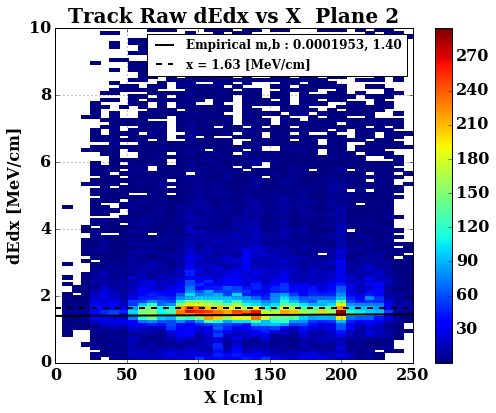

In [18]:
dEdxVsX("hdEdxVsXCor_1_0_2",'OffBeam',4.,250,0.01,10,mult='Raw dEdx vs X  Plane 2')
dEdxVsX("hdEdxVsX_1_0_2",'OffBeam',5,250,0,10,mult='Raw dEdx vs X  Plane 2',plane=2)
# Need bins 37 rather than 38

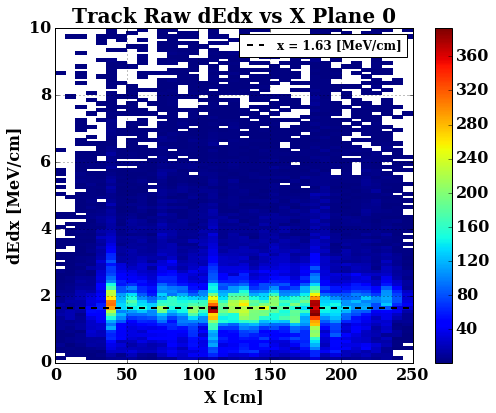

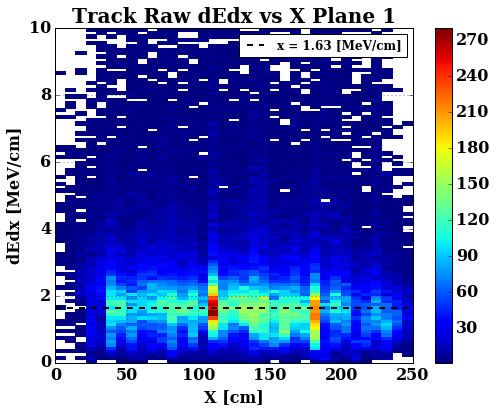

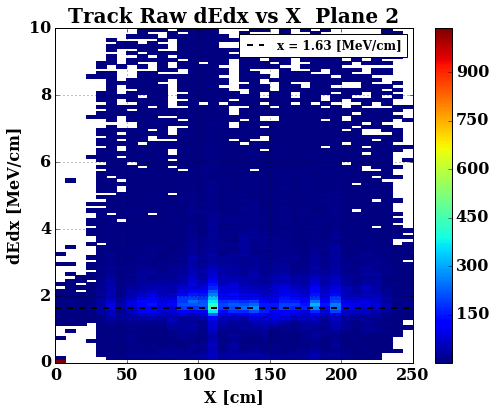

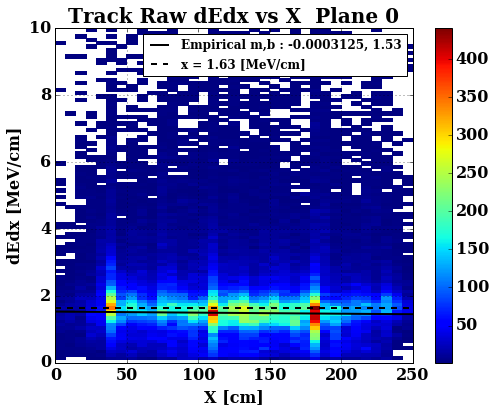

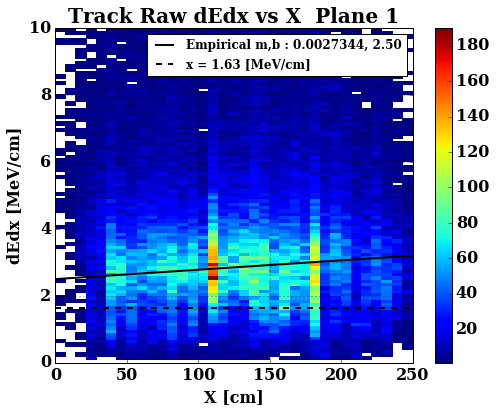

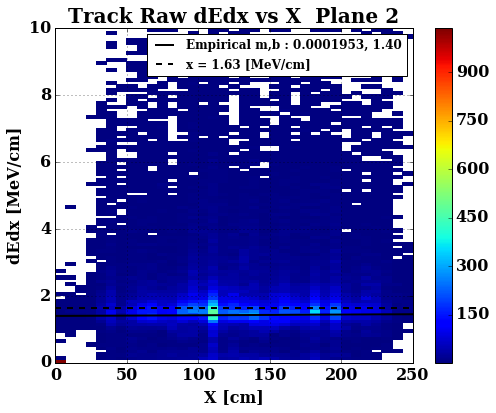

In [9]:
dEdxVsX("hdEdxVsXCor_1_0_0",'OffBeam',0,250,0,10,mult='Raw dEdx vs X Plane 0')
dEdxVsX("hdEdxVsXCor_1_0_1",'OffBeam',0,250,0,10,mult='Raw dEdx vs X Plane 1')
dEdxVsX("hdEdxVsXCor_1_0_2",'OffBeam',0,250,0,10,mult='Raw dEdx vs X  Plane 2')

dEdxVsX("hdEdxVsX_1_0_0",'OffBeam',0,250,0,10,mult='Raw dEdx vs X  Plane 0',plane=0)
dEdxVsX("hdEdxVsX_1_0_1",'OffBeam',0,250,0,10,mult='Raw dEdx vs X  Plane 1',plane=1)
dEdxVsX("hdEdxVsX_1_0_2",'OffBeam',0,250,0,10,mult='Raw dEdx vs X  Plane 2',plane=2)


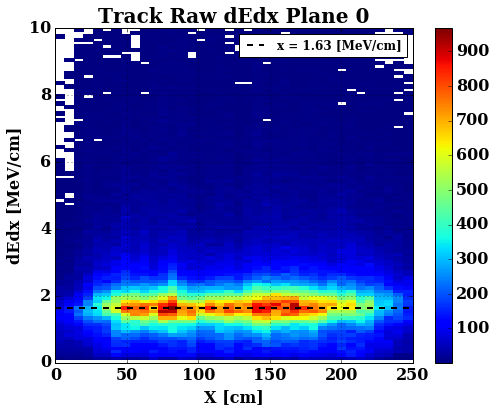

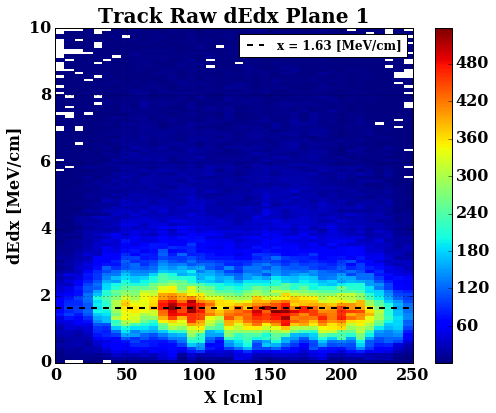

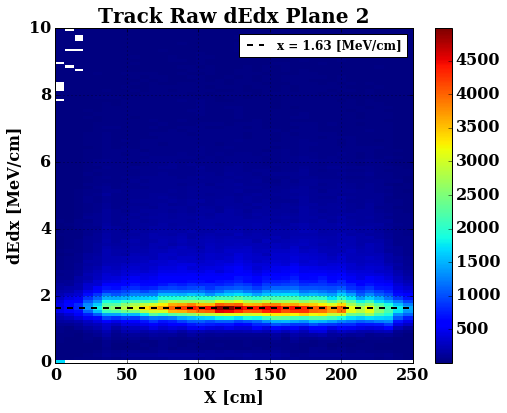

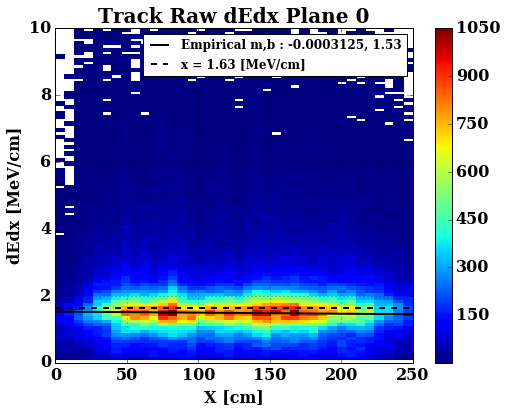

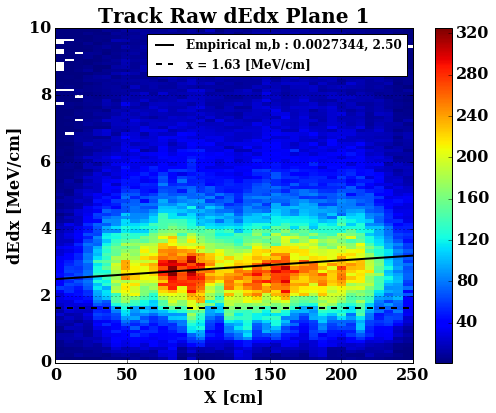

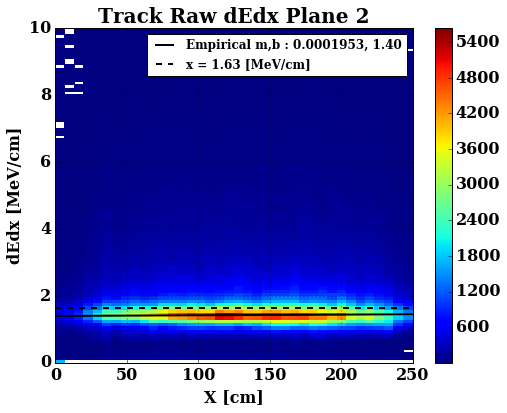

In [128]:
dEdxVsX("hdEdxVsXCor_0_0_0",'OnBeam',0,250,0,10,mult='Raw dEdx Plane 0')
dEdxVsX("hdEdxVsXCor_0_0_1",'OnBeam',0,250,0,10,mult='Raw dEdx Plane 1')
dEdxVsX("hdEdxVsXCor_0_0_2",'OnBeam',0,250,0,10,mult='Raw dEdx Plane 2')

dEdxVsX("hdEdxVsX_0_0_0",'OnBeam',0,250,0,10,mult='Raw dEdx Plane 0',plane=0)
dEdxVsX("hdEdxVsX_0_0_1",'OnBeam',0,250,0,10,mult='Raw dEdx Plane 1',plane=1)
dEdxVsX("hdEdxVsX_0_0_2",'OnBeam',0,250,0,10,mult='Raw dEdx Plane 2',plane=2)


In [18]:
def dEdxVsX1D(hist0,hist2,sample,plane=-1):
   
    h = f_root.Get(hist0) 
    h_v, edges = rn.hist2array(h,return_edges=True)
    
    binsx = (edges[0][:-1] + edges[0][1:])/2
    binsy = (edges[1][:-1] + edges[1][1:])/2

    x, y = binsx, binsy
    y_new = []; x_new = []
    
    for i in xrange(binsx.shape[0]):
        for j in xrange(binsy.shape[0]):
            k = h_v[i][j]
            while k > 0:
                y_new.append(binsy[j])
                x_new.append(binsx[i])
            
                k -= 1
        
    H, xedges, yedges = np.histogram2d(y_new,x_new,bins=(100,38),range=((0,10),(0,250)))
     
    dedx0 = [ H[i].cumsum()[-1] for i in xrange(xedges.shape[0]-1) ]  
    dedx0 = np.array(dedx0) 
    dedx0 /= dedx0.cumsum()[-1]
    
    ######################################################
    
    h = f_root.Get(hist2) 
    h_v, edges = rn.hist2array(h,return_edges=True)
    
    binsx = (edges[0][:-1] + edges[0][1:])/2
    binsy = (edges[1][:-1] + edges[1][1:])/2

    x, y = binsx, binsy
    y_new = []; x_new = []
    
    for i in xrange(binsx.shape[0]):
        for j in xrange(binsy.shape[0]):
            k = h_v[i][j]
            while k > 0:
                y_new.append(binsy[j])
                x_new.append(binsx[i])
            
                k -= 1
        
    H, xedges, yedges = np.histogram2d(y_new,x_new,bins=(100,38),range=((0,10),(0,250)))
     
    dedx2 = [ H[i].cumsum()[-1] for i in xrange(xedges.shape[0]-1) ]  
    dedx2 = np.array(dedx2) 
    dedx2 /= dedx2.cumsum()[-1]
    
    fig = plt.figure(figsize=(8,6))
    #plt.axvline(1.63)
    #plt.plot(xedges[:-1],dedx0,lw=2,color='k',label='Data')
    plt.plot(xedges[:-1],dedx2,lw=2,color='r',label='MC')
    plt.grid(True)
    #plt.axvline(1.63,lw=3,ls='--',color='b',label='1.63 MeV/cm')
    plt.legend()
    plt.title("Track dEdx %s"%(sample),fontsize=20,weight='bold')
        
    plt.xlabel('dEdx [MeV/cm]',fontsize=16,weight='bold')
    plt.xlim(0,6)
    plt.savefig('Plots/CutJustify_sel2_%s_plane_%s.png' % (hist0,plane))

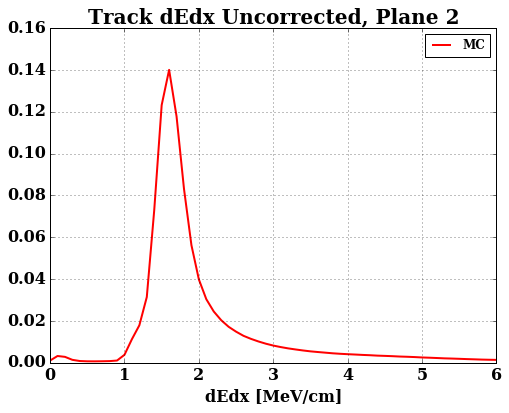

In [19]:
dEdxVsX1D('hdEdxVsX_0_0_2','hdEdxVsX_2_0_2','Uncorrected, Plane 2',plane=2)


In [8]:
#dEdxVsX1D('hdEdxVsX_1_0_2','hdEdxVsX_2_0_2','Uncorrected, Plane 2',plane=2)


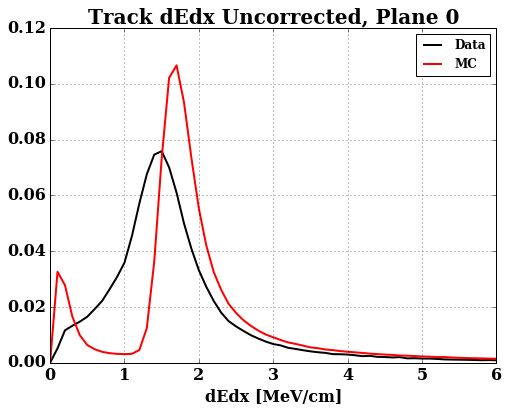

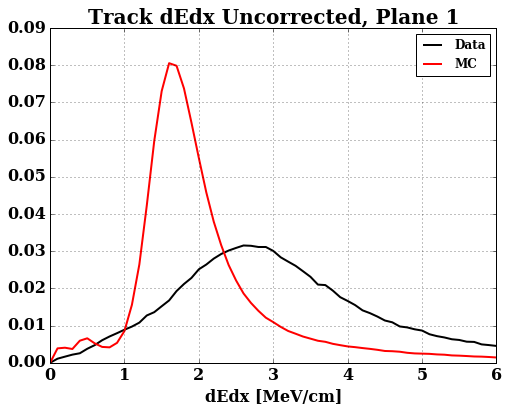

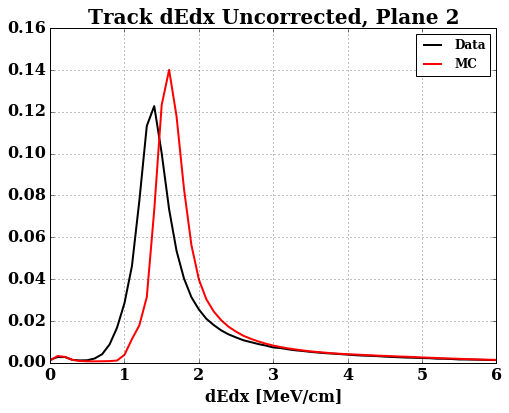

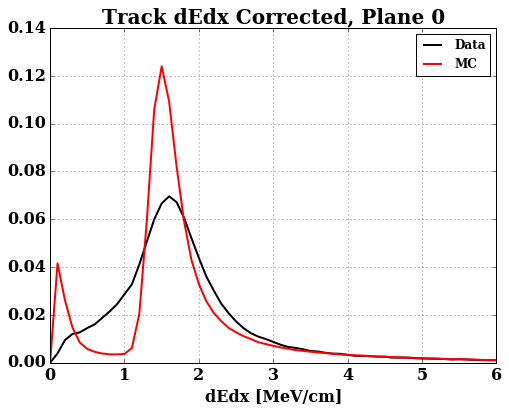

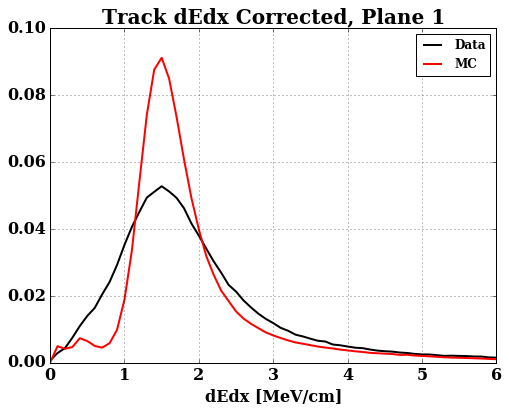

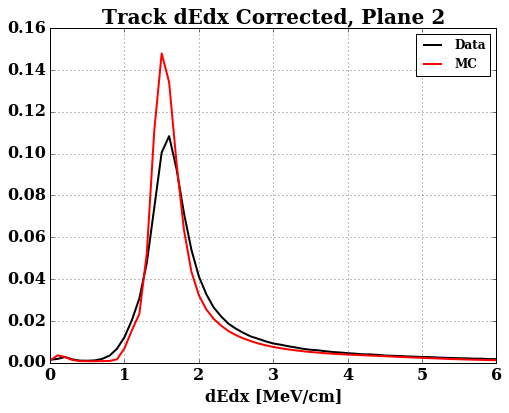

In [131]:
dEdxVsX1D('hdEdxVsX_0_0_0','hdEdxVsX_2_0_0','Uncorrected, Plane 0',plane=0)
dEdxVsX1D('hdEdxVsX_0_0_1','hdEdxVsX_2_0_1','Uncorrected, Plane 1',plane=1)
dEdxVsX1D('hdEdxVsX_0_0_2','hdEdxVsX_2_0_2','Uncorrected, Plane 2',plane=2)

dEdxVsX1D('hdEdxVsXCor_0_0_0','hdEdxVsXCor_2_0_0','Corrected, Plane 0',plane=0)
dEdxVsX1D('hdEdxVsXCor_0_0_1','hdEdxVsXCor_2_0_1','Corrected, Plane 1',plane=1)
dEdxVsX1D('hdEdxVsXCor_0_0_2','hdEdxVsXCor_2_0_2','Corrected, Plane 2',plane=2)

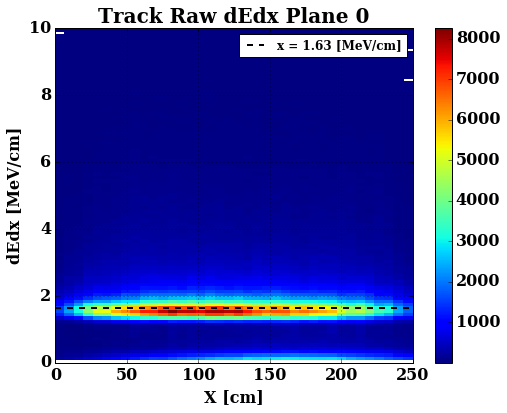

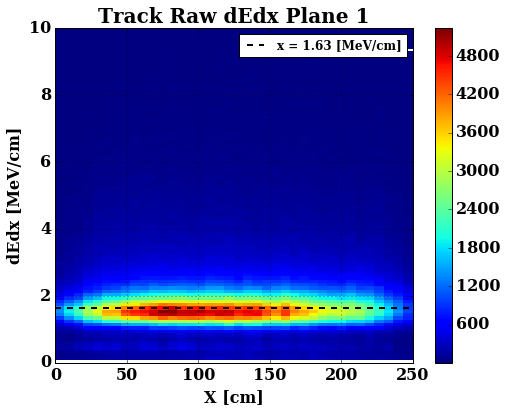

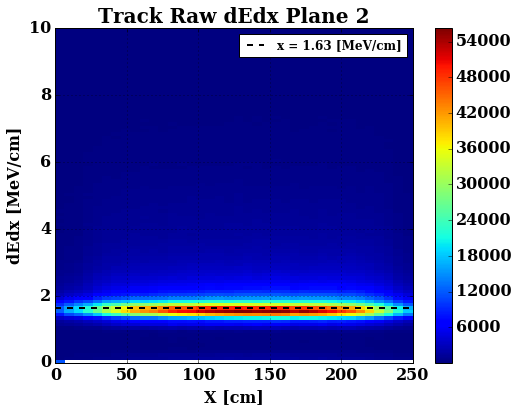

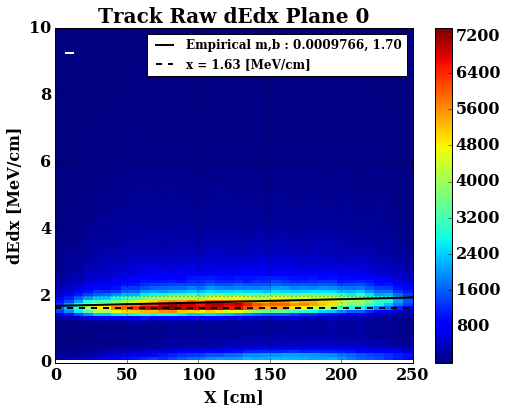

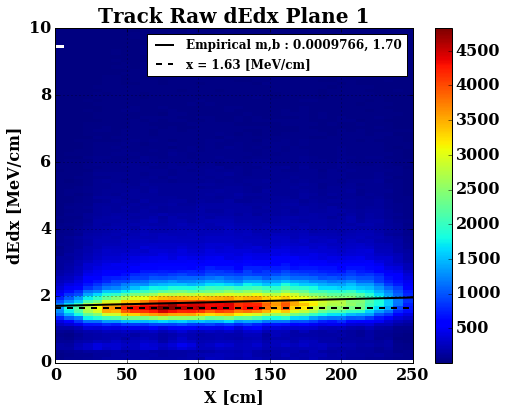

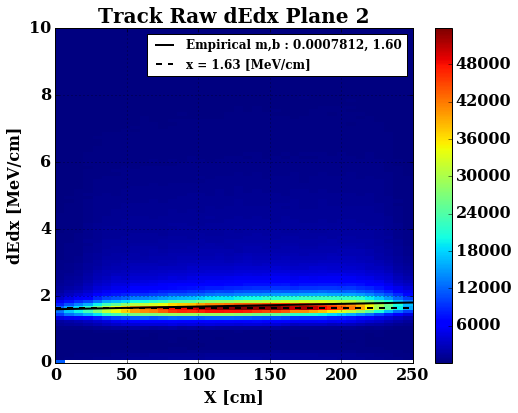

In [132]:
dEdxVsX("hdEdxVsXCor_2_0_0",'MC',0,250,0,10,mult='Raw dEdx Plane 0')
dEdxVsX("hdEdxVsXCor_2_0_1",'MC',0,250,0,10,mult='Raw dEdx Plane 1')
dEdxVsX("hdEdxVsXCor_2_0_2",'MC',0,250,0,10,mult='Raw dEdx Plane 2')

dEdxVsX("hdEdxVsX_2_0_0",'MC',0,250,0,10,mult='Raw dEdx Plane 0',plane=0)
dEdxVsX("hdEdxVsX_2_0_1",'MC',0,250,0,10,mult='Raw dEdx Plane 1',plane=1)
dEdxVsX("hdEdxVsX_2_0_2",'MC',0,250,0,10,mult='Raw dEdx Plane 2',plane=2)

/Library/Python/2.7/site-packages/matplotlib/legend.py:325: UserWarning: Unrecognized location "upper_left". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  six.iterkeys(self.codes))))


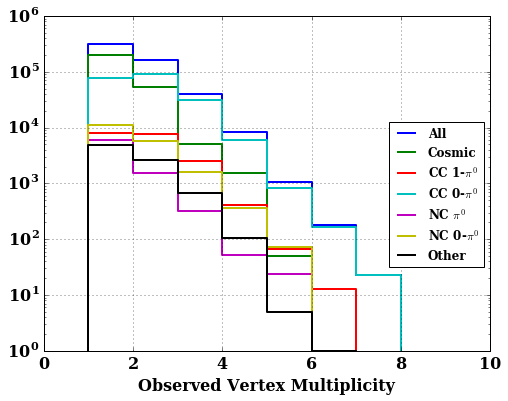

In [20]:
name_v = ['All','Cosmic','CC 1-$\\pi^0$','CC 0-$\\pi^0$','NC $\\pi^0$','NC 0-$\\pi^0$','Other']
#color_v = ['blue','green','red','darkturquoise','purple','goldenrod','black'] #lightskyblue','salmon'] 

color_v = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

fig = plt.figure(figsize=(8,6))
for i in xrange(0,7):
    h = f_root.Get('hMul_2_%i'%i)
    h_v, edges = rn.hist2array(h,return_edges=True)
    left, right = edges[0][:-1], edges[0][1:]
    X = np.array([left,right]).T.flatten()
    Y = np.array([h_v,h_v]).T.flatten()
    plt.plot(X,Y,label=name_v[i],lw=2,color=color_v[i])

plt.grid(True)
plt.xlabel('Observed Vertex Multiplicity',fontsize=16,weight='bold')
plt.legend(loc='upper_left',bbox_to_anchor=(1,0.7))
plt.savefig('Plots/CutJustify_sel2_mult.png')

plt.yscale('log')
plt.savefig('Plots/CutJustify_sel2_multlog.png')

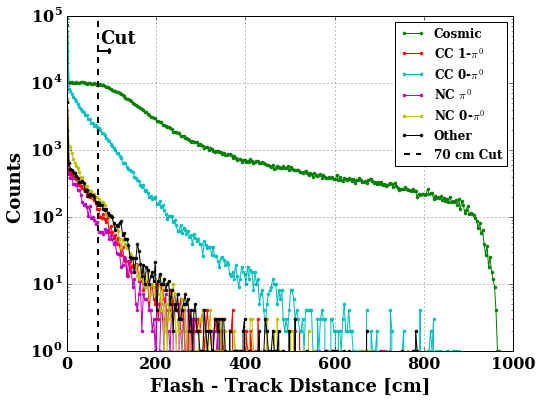

In [204]:
plt.figure(figsize=(8,6))

for i in xrange(1,len(label_v)):
    h = f_root.Get("hFlashTrackDist_2_%i"%i) 
    h_v = rn.hist2array(h)
    #plt.plot(h_v,label=name_v[i],marker='.')
    counts, edges = rn.hist2array(h,return_edges=True)
    bins = (edges[0][:-1] + edges[0][1:])/2
    plt.plot(bins,counts,label=name_v[i],marker='.',color=color_v[i])

    plt.grid(True)#,color='k',lw=3)
#plt.title("Largest Flash in Event by Neutrino Interaction",fontsize=20,weight='bold')
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.xlabel("Flash - Track Distance [cm]",fontsize=18,weight='bold')
plt.axvline(70,lw=2,color='k',ls='--',label='70 cm Cut')
plt.legend(loc=0)
plt.yscale('log')

ax = plt.axes()
ax.arrow(70, 30000,25, 0, head_width=5000, head_length=3, fc='k',ec='k',lw=2)
plt.text(75,40000, 'Cut',fontsize=18,weight='bold',color='k')

plt.savefig('Plots/CutJustify_sel2_flashtrkdist.png')
plt.xlim(0,200)
lgd = plt.legend(loc='upper_left',bbox_to_anchor=(1,0.3))
plt.savefig('Plots/CutJustify_sel2_flashtrkdist_zoom.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

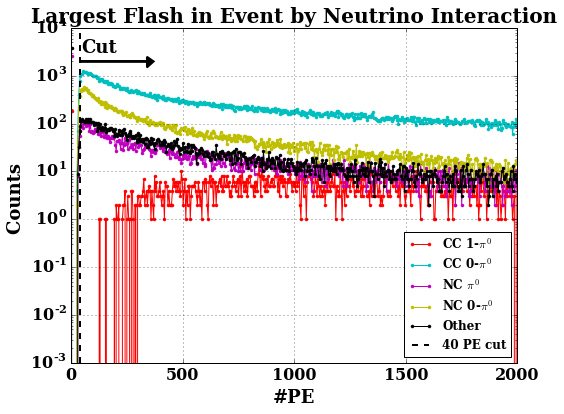

In [156]:
plt.figure(figsize=(8,6))

for i in xrange(2,len(label_v)):
    h = f_root.Get("hPEDist_2_%i"%i) 
    h_v = rn.hist2array(h)
    #plt.plot(h_v,label=name_v[i],marker='.')
    
    counts, edges = rn.hist2array(h,return_edges=True)
    bins = (edges[0][:-1] + edges[0][1:])/2
    plt.plot(bins,counts,label=name_v[i],marker='.',color=color_v[i])

    plt.grid(True)#,color='k',lw=3)

cut = 40
    
plt.title("Largest Flash in Event by Neutrino Interaction",fontsize=20,weight='bold')
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.xlabel("#PE",fontsize=18,weight='bold')
plt.yscale('log')
#plt.ylim(0,20000)
plt.axvline(cut,lw=2,color='k',ls='--',label='%i PE cut'%cut)
plt.legend(loc=0)
plt.xlim(0,500)
plt.ylim(0.001,10000)

ax = plt.axes()
ax.arrow(40,2000,300, 0, head_width=1000, head_length=30, fc='k',ec='k',lw=2)
plt.text(45,3000, 'Cut',fontsize=18,weight='bold',color='k')

plt.savefig('Plots/CutJustify_sel2_numPE_zoom.png')

plt.xlim(0,2000)
plt.savefig('Plots/CutJustify_sel2_numPE.png')

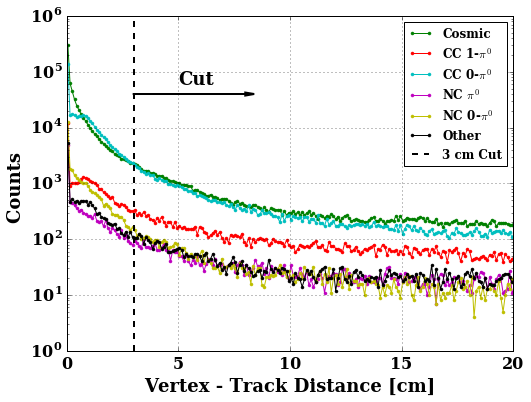

In [168]:
plt.figure(figsize=(8,6))

for i in xrange(1,len(label_v)):
    h = f_root.Get("hVtxTrackDist_2_%i"%i) 
    h_v = rn.hist2array(h)
    #plt.plot(h_v,label=name_v[i],marker='.')
    
    counts, edges = rn.hist2array(h,return_edges=True)
    bins = (edges[0][:-1] + edges[0][1:])/2
    plt.plot(bins,counts,label=name_v[i],marker='.',color=color_v[i])

    plt.grid(True)#,color='k',lw=3)
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.xlabel("Vertex - Track Distance [cm]",fontsize=18,weight='bold')
plt.axvline(3,lw=2,color='k',ls='--',label='3 cm Cut')
plt.legend(loc=0)
plt.xlim(0,20)
plt.yscale('log')
ax = plt.axes()
ax.arrow(3,40000,5, 0, head_width=5000, head_length=0.4, fc='k',ec='k',lw=2)
plt.text(5,60000, 'Cut',fontsize=18,weight='bold',color='k')

plt.savefig('Plots/CutJustify_sel2_vtxtrackdist.png')

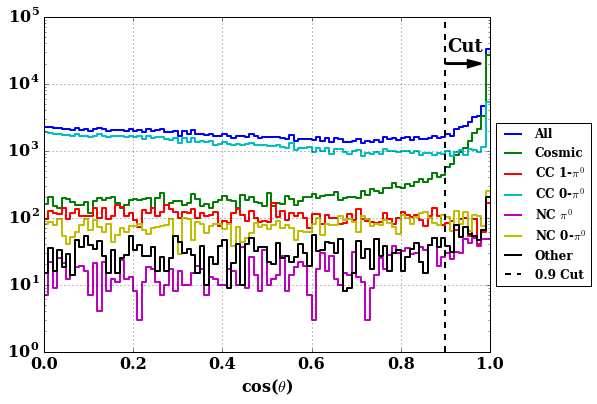

In [183]:
fig = plt.figure(figsize=(8,6))
for i in xrange(0,7):
    h = f_root.Get('hCos3_2_%i'%i)
    h_v, edges = rn.hist2array(h,return_edges=True)
    left, right = edges[0][:-1], edges[0][1:]
    X = np.array([left,right]).T.flatten()
    Y = np.array([h_v,h_v]).T.flatten()
    plt.plot(X,Y,label=name_v[i],lw=2,color=color_v[i])

plt.axvline(0.9,lw=2,ls='--',c='k',label='0.9 Cut')
plt.yscale('log')
plt.grid(True)
plt.xlabel('cos($\\theta$)',fontsize=16,weight='bold')
lgd = plt.legend(loc='upper_left',bbox_to_anchor=(1,0.7))
ax = plt.axes()
ax.arrow(0.9,20000,0.05, 0, head_width=5000, head_length=0.03, fc='k',ec='k',lw=2)
plt.text(0.905,30000, 'Cut',fontsize=18,weight='bold',color='k')

plt.savefig('Plots/CutJustify_sel2_cosangle.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

Cosmic


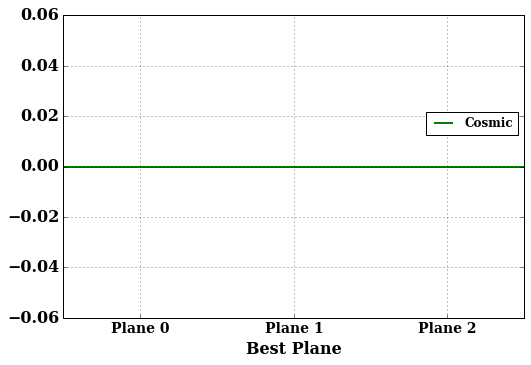

In [19]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
x_label_v = ['Plane 0','Plane 1','Plane 2']
ax.set_xticks([i +0.5 for i in xrange(0,3)]) 
#print name_v[1]

for i in xrange(0,7):
    #i = 1
    #print name_v[i]
    h = f_root.Get('hBestPlane2_%i'%i)
    h_v, edges = rn.hist2array(h,return_edges=True)
    left, right = edges[0][:-1], edges[0][1:]
    X = np.array([left,right]).T.flatten()
    Y = np.array([h_v,h_v]).T.flatten()
    plt.plot(X,Y,label=name_v[i],lw=2,color=color_v[i])
    #if i == 3 :
    #break
ax.xaxis.set_ticks_position('bottom')
ax.set_xticklabels(x_label_v,fontsize=14)#,weight='bold') #'CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
plt.xlabel('Best Plane',fontsize=16,weight='bold')
#plt.yscale('log')
plt.grid(True)
lgd = plt.legend(loc='upper_left',bbox_to_anchor=(1,0.7))
plt.savefig('Plots/CutJustify_sel2_bestplane.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

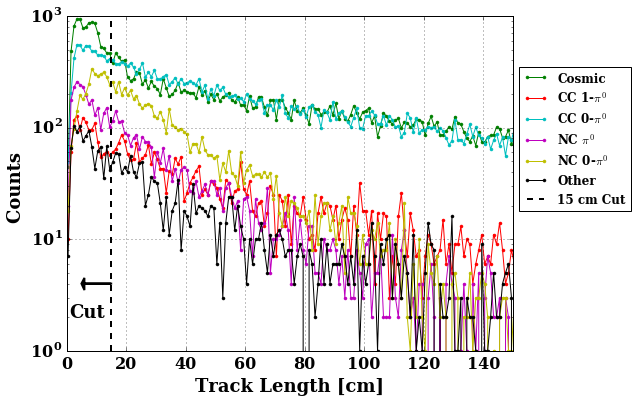

In [178]:
color_v = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
cut = 15
plt.figure(figsize=(8,6))

for i in xrange(1,len(label_v)):
    h = f_root.Get("hTrackLength1_2_%i"%i) 
    h_v = rn.hist2array(h)
    
    counts, edges = rn.hist2array(h,return_edges=True)
    bins = (edges[0][:-1] + edges[0][1:])/2
    plt.plot(bins,counts,label=name_v[i],marker='.',color=color_v[i])
    plt.grid(True)#,color='k',lw=3)
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.xlabel("Track Length [cm]",fontsize=18,weight='bold')
plt.axvline(cut,lw=2,color='k',ls='--',label='%s cm Cut'%cut)
plt.legend(loc='upper left',bbox_to_anchor=(1,0.75))
plt.yscale('log')
plt.xlim(0,150)
ax = plt.axes()
ax.arrow(15,4,-9, 0, head_width=1, head_length=1, fc='k',ec='k',lw=2)
plt.text(1,2, 'Cut',fontsize=18,weight='bold',color='k')

lgd = plt.legend(loc='upper_left',bbox_to_anchor=(1,0.4))
plt.savefig('Plots/CutJustify_sel2_mult1_tracklen.png',bbox_extra_artists=(lgd,), bbox_inches='tight')


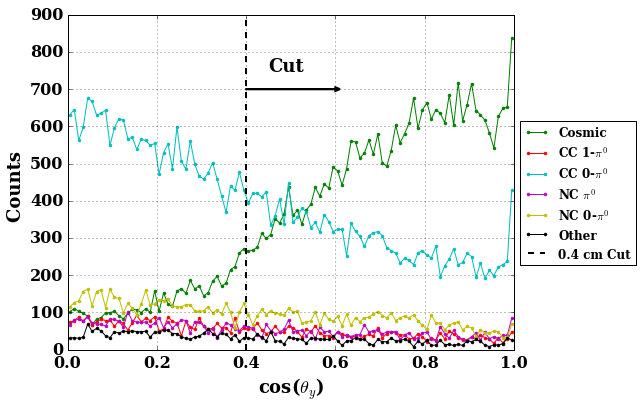

In [22]:
color_v = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
cut = 0.4
plt.figure(figsize=(8,6))

for i in xrange(1,len(label_v)):
    h = f_root.Get("hTrackCosyMult1_2_%i"%i) 
    h_v = rn.hist2array(h)
    
    counts, edges = rn.hist2array(h,return_edges=True)
    bins = (edges[0][:-1] + edges[0][1:])/2
    plt.plot(bins,counts,label=name_v[i],marker='.',color=color_v[i])
    plt.grid(True)#,color='k',lw=3)
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.xlabel("cos($\\theta_y$)",fontsize=18,weight='bold')
#plt.legend(loc='upper left',bbox_to_anchor=(1,0.75))
plt.axvline(cut,lw=2,color='k',ls='--',label='%s cm Cut'%cut)
lgd = plt.legend(loc='upper_left',bbox_to_anchor=(1,0.7))
ax = plt.axes()
ax.arrow(0.4,700,0.2, 0, head_width=10, head_length=.01, fc='k',ec='k',lw=2)
plt.text(0.45,750, 'Cut',fontsize=18,weight='bold',color='k')

plt.savefig('Plots/CutJustify_sel2_mult1_dcosy.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

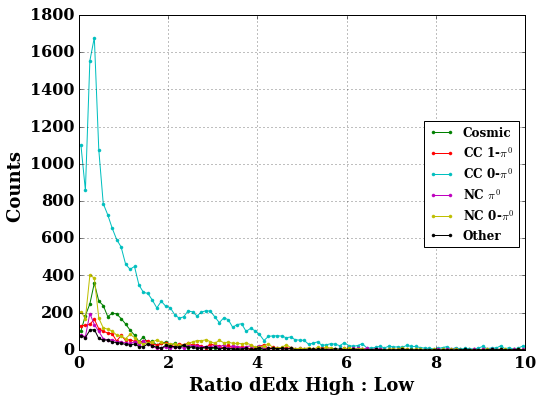

In [184]:
color_v = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
cut = 0.4
plt.figure(figsize=(8,6))

for i in xrange(1,len(label_v)):
    h = f_root.Get("hRatiodEdxHighLowMult1_2_%i"%i) 
    h_v = rn.hist2array(h)
    
    counts, edges = rn.hist2array(h,return_edges=True)
    bins = (edges[0][:-1] + edges[0][1:])/2
    plt.plot(bins,counts,label=name_v[i],marker='.',color=color_v[i])
    plt.grid(True)#,color='k',lw=3)
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.xlabel("Ratio dEdx High : Low",fontsize=18,weight='bold')
#plt.legend(loc='upper left',bbox_to_anchor=(1,0.75))
#plt.axvline(cut,lw=2,color='k',ls='--',label='%s cm Cut'%cut)
lgd = plt.legend(loc='upper_left',bbox_to_anchor=(1,0.7))
plt.yscale('log')


plt.savefig('Plots/CutJustify_sel2_mult1_ratiodedx_log.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.yscale('linear')
plt.savefig('Plots/CutJustify_sel2_mult1_ratiodedx.png',bbox_extra_artists=(lgd,), bbox_inches='tight')


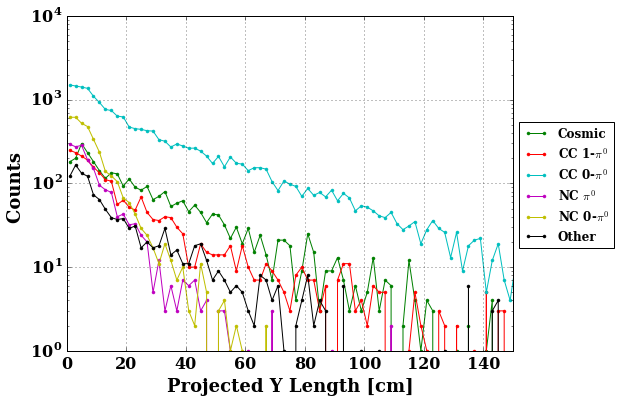

In [185]:
color_v = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
cut = 0.4
plt.figure(figsize=(8,6))

for i in xrange(1,len(label_v)):
    h = f_root.Get("hProjYLenMult1_2_%i"%i) 
    h_v = rn.hist2array(h)
    
    counts, edges = rn.hist2array(h,return_edges=True)
    bins = (edges[0][:-1] + edges[0][1:])/2
    plt.plot(bins,counts,label=name_v[i],marker='.',color=color_v[i])
    plt.grid(True)#,color='k',lw=3)
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.xlabel("Projected Y Length [cm]",fontsize=18,weight='bold')
#plt.legend(loc='upper left',bbox_to_anchor=(1,0.75))
#plt.axvline(cut,lw=2,color='k',ls='--',label='%s cm Cut'%cut)
plt.yscale('log')
plt.xlim(0,150)
lgd = plt.legend(loc='upper_left',bbox_to_anchor=(1,0.7))

plt.savefig('Plots/CutJustify_sel2_mult1_projylen.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

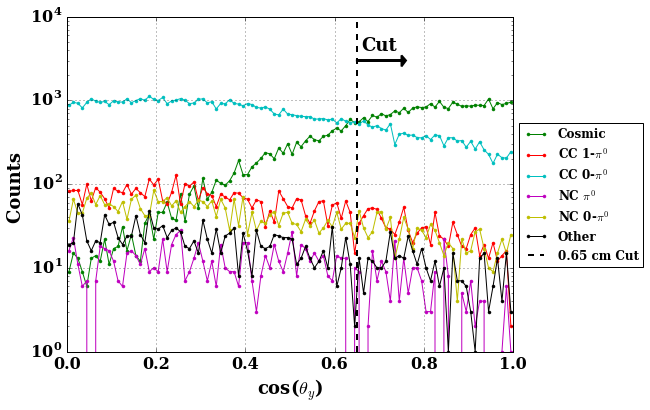

In [23]:
color_v = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
cut = 0.65
plt.figure(figsize=(8,6))

for i in xrange(1,len(label_v)):
    h = f_root.Get("hCosyTrack0Multgt1_2_%i"%i) 
    h_v = rn.hist2array(h)
    
    counts, edges = rn.hist2array(h,return_edges=True)
    bins = (edges[0][:-1] + edges[0][1:])/2
    plt.plot(bins,counts,label=name_v[i],marker='.',color=color_v[i])
    plt.grid(True)#,color='k',lw=3)
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.xlabel("cos($\\theta_y$)",fontsize=18,weight='bold')
plt.axvline(cut,lw=2,color='k',ls='--',label='%s cm Cut'%cut)
#plt.legend(loc='upper left',bbox_to_anchor=(1,0.75))
plt.yscale('log')
#plt.xlim(0,150)
ax = plt.axes()
ax.arrow(0.65,3000,0.1, 0, head_width=900, head_length=.01, fc='k',ec='k',lw=2)
plt.text(0.66,3900, 'Cut',fontsize=18,weight='bold',color='k')

lgd = plt.legend(loc='upper_left',bbox_to_anchor=(1,0.7))
plt.savefig('Plots/CutJustify_sel2_multgt1_cosy0.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

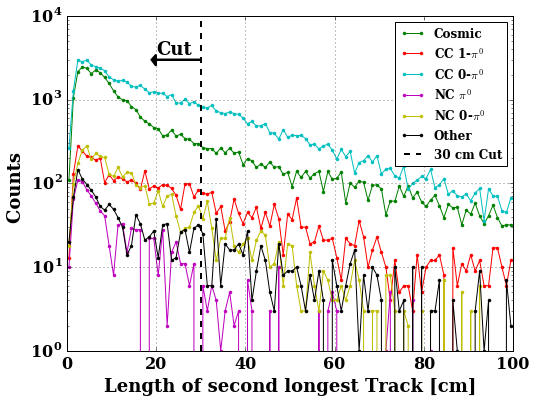

In [190]:
color_v = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
cut = 30
plt.figure(figsize=(8,6))

for i in xrange(1,len(label_v)):
    h = f_root.Get("hLenTrack1Multgt1_2_%i"%i) 
    h_v = rn.hist2array(h)
    
    counts, edges = rn.hist2array(h,return_edges=True)
    bins = (edges[0][:-1] + edges[0][1:])/2
    plt.plot(bins,counts,label=name_v[i],marker='.',color=color_v[i])
    plt.grid(True)#,color='k',lw=3)
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.xlabel("Length of second longest Track [cm]",fontsize=18,weight='bold')
plt.axvline(cut,lw=2,color='k',ls='--',label='%s cm Cut'%cut)
plt.legend(loc=0) #'upper left',bbox_to_anchor=(1,0.75))
plt.yscale('log')
ax = plt.axes()
ax.arrow(30,3000,-10, 0, head_width=900, head_length=1, fc='k',ec='k',lw=2)
plt.text(20,3500, 'Cut',fontsize=18,weight='bold',color='k')

#plt.xlim(0,30)
plt.savefig('Plots/CutJustify_sel2_multgt1_tracklen1.png')

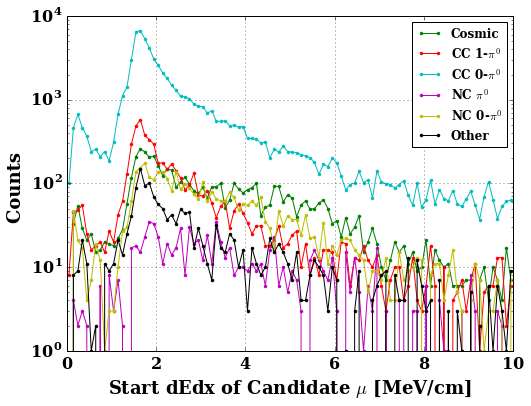

In [194]:
color_v = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
cut = 2.5
plt.figure(figsize=(8,6))

for i in xrange(1,len(label_v)):
    h = f_root.Get("hdEdxLongStart_2_%i"%i) 
    h_v = rn.hist2array(h)
    
    counts, edges = rn.hist2array(h,return_edges=True)
    bins = (edges[0][:-1] + edges[0][1:])/2
    plt.plot(bins,counts,label=name_v[i],marker='.',color=color_v[i])
    plt.grid(True)#,color='k',lw=3)
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.xlabel("Start dEdx of Candidate $\mu$ [MeV/cm]",fontsize=18,weight='bold')
#plt.axvline(cut,lw=2,color='k',ls='--',label='%s cm Cut'%cut)
plt.legend(loc=0) #'upper left',bbox_to_anchor=(1,0.75))
plt.yscale('log')
#plt.xlim(0,30)
plt.savefig('Plots/CutJustify_sel2_mult2_dedx_st.png')

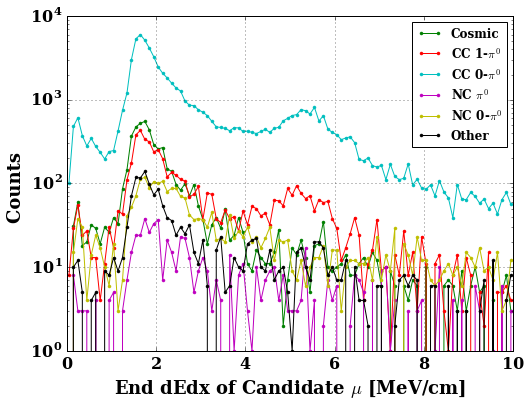

In [195]:
color_v = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
cut = 30
plt.figure(figsize=(8,6))

for i in xrange(1,len(label_v)):
    h = f_root.Get("hdEdxLongEnd_2_%i"%i) 
    h_v = rn.hist2array(h)
    
    counts, edges = rn.hist2array(h,return_edges=True)
    bins = (edges[0][:-1] + edges[0][1:])/2
    plt.plot(bins,counts,label=name_v[i],marker='.',color=color_v[i])
    plt.grid(True)#,color='k',lw=3)
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.xlabel("End dEdx of Candidate $\mu$ [MeV/cm]",fontsize=18,weight='bold')
#plt.axvline(cut,lw=2,color='k',ls='--',label='%s cm Cut'%cut)
plt.legend(loc=0) #'upper left',bbox_to_anchor=(1,0.75))
plt.yscale('log')
#plt.xlim(0,30)
plt.savefig('Plots/CutJustify_sel2_mult2_dedx_end.png')

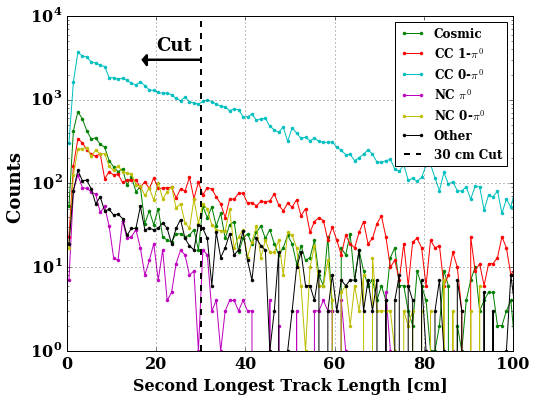

In [201]:
color_v = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
cut = 30
plt.figure(figsize=(8,6))

for i in xrange(1,len(label_v)):
    h = f_root.Get("hTrackLength3_2_%i"%i) 
    h_v = rn.hist2array(h)
    
    counts, edges = rn.hist2array(h,return_edges=True)
    bins = (edges[0][:-1] + edges[0][1:])/2
    plt.plot(bins,counts,label=name_v[i],marker='.',color=color_v[i])
    plt.grid(True)#,color='k',lw=3)
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.axvline(cut,lw=2,color='k',ls='--',label='%s cm Cut'%cut)
plt.xlabel('Second Longest Track Length [cm]',fontsize=16,weight='bold')
plt.legend(loc=0) #'upper left',bbox_to_anchor=(1,0.75))
plt.yscale('log')
plt.xlim(0,100)
ax = plt.axes()
ax.arrow(30,3000,-12, 0, head_width=900, head_length=1, fc='k',ec='k',lw=2)
plt.text(20,3900, 'Cut',fontsize=18,weight='bold',color='k')

plt.savefig('Plots/CutJustify_sel2_mult2_trklen.png')

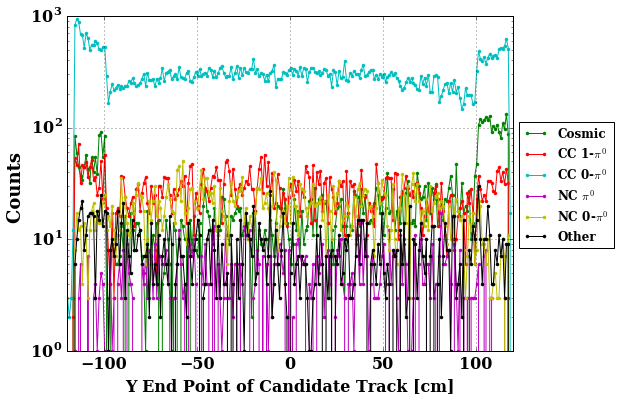

In [203]:
color_v = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
cut = 30
plt.figure(figsize=(8,6))

for i in xrange(1,len(label_v)):
    h = f_root.Get("hTrackEndy1_2_%i"%i) 
    h_v = rn.hist2array(h)
    
    counts, edges = rn.hist2array(h,return_edges=True)
    bins = (edges[0][:-1] + edges[0][1:])/2

    plt.plot(bins,counts,label=name_v[i],marker='.',color=color_v[i])
    
    #new_counts = [counts[j]+counts[j+1] for j in xrange(0,len(counts)-1,5) ]
    #new_bins = bins[::5]
    #plt.plot(new_bins,new_counts,label=name_v[i],marker='.',color=color_v[i])

    plt.grid(True)#,color='k',lw=3)
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.grid(True)
plt.legend(loc=0)
plt.yscale('log')
#plt.ylim(0,400)
plt.xlim(-120,120)
plt.xlabel('Y End Point of Candidate Track [cm]',fontsize=16,weight='bold')
lgd = plt.legend(loc='upper_left',bbox_to_anchor=(1,0.7))
plt.savefig('Plots/CutJustify_sel2_mult2_longesttrk_endy.png',bbox_extra_artists=(lgd,), bbox_inches='tight')

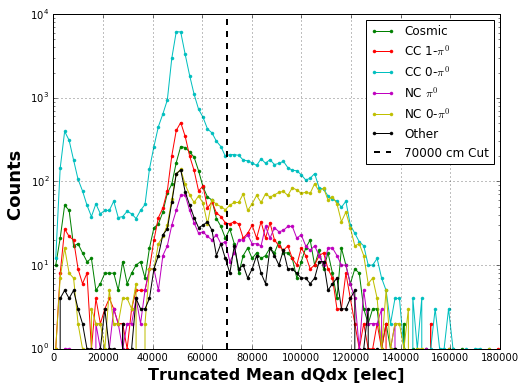

In [22]:
color_v = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
cut = 70000
plt.figure(figsize=(8,6))

for i in xrange(1,len(label_v)):
    h = f_root.Get("hMIPdQdx_2_%i"%i) 
    h_v = rn.hist2array(h)
    
    counts, edges = rn.hist2array(h,return_edges=True)
    bins = (edges[0][:-1] + edges[0][1:])/2
    plt.plot(bins,counts,label=name_v[i],marker='.',color=color_v[i])
    plt.grid(True)#,color='k',lw=3)
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.grid(True)
plt.yscale('log')
plt.axvline(cut,lw=2,color='k',ls='--',label='%s cm Cut'%cut)
#plt.ylim(0,400)
plt.legend(loc=0)
#plt.xlim(-120,120)
plt.xlabel('Truncated Mean dQdx [elec]',fontsize=16,weight='bold')
plt.savefig('Plots/CutJustify_sel2_allmult_MIPdqdx.png')

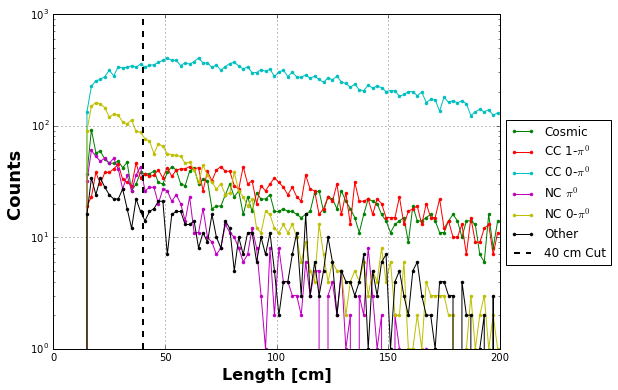

In [23]:
color_v = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
cut = 70000
plt.figure(figsize=(8,6))

cut = 40
for i in xrange(1,len(label_v)):
    h = f_root.Get("hMIPLen_2_%i"%i) 
    h_v = rn.hist2array(h)
    
    counts, edges = rn.hist2array(h,return_edges=True)
    bins = (edges[0][:-1] + edges[0][1:])/2
    plt.plot(bins,counts,label=name_v[i],marker='.',color=color_v[i])
    plt.grid(True)#,color='k',lw=3)
plt.ylabel("Counts ",fontsize=18,weight='bold')
plt.grid(True)
plt.yscale('log')
plt.axvline(cut,lw=2,color='k',ls='--',label='%s cm Cut'%cut)
#plt.ylim(0,400)
#plt.xlim(-120,120)
lgd = plt.legend(loc='upper_left',bbox_to_anchor=(1,0.7))
plt.xlabel('Length [cm]',fontsize=16,weight='bold')
plt.savefig('Plots/CutJustify_sel2_allmult_MIPlen.png',bbox_extra_artists=(lgd,), bbox_inches='tight')